# DATA ANALYSIS ON GOOGLE APP'S RATINGS

### IMPORT THE SPECIFIC MODULES:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### READ DATA USING PD.READ_CSV BECAUSE THE FILE IS IN FORMAT OF CSV.

In [28]:
app_rating_data=pd.read_csv('googleplaystore.csv')
app_rating_data.head() ##we use head function to see top 5 rows if you want to see 10 rows or 15 rows just type number inside the head function.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


LET'S SEE HOW MANY ROWS AND COLUMNS OUR DATASET CONTAIN:

In [29]:
app_rating_data.shape      ##it contains 10841 Rows and 13 Columns

(10841, 13)

Now let's see some statistical summary:

In [30]:
app_rating_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Let's make a box plot on these statistical summary:

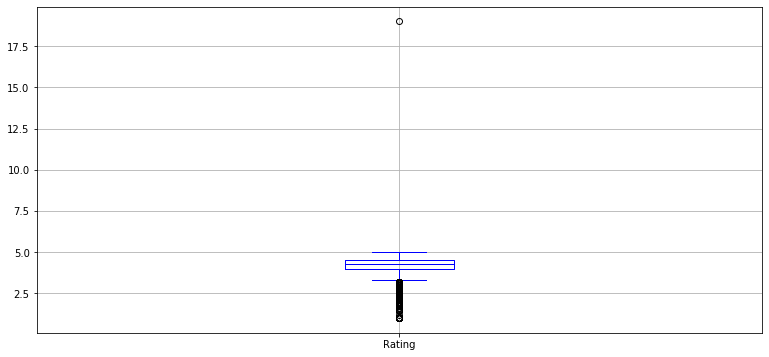

In [31]:
app_rating_data.boxplot(figsize=(13,6),color='blue')

### Now let's check some info about our dataset:

In [32]:
app_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


## DATA CLEANING LET'S EXPLORE THIS IT WILL BE AMAZING:

let's check how many null values we have:

In [33]:
app_rating_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Check how many rating has more than 5 outlier:

In [34]:
app_rating_data[app_rating_data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [35]:
app_rating_data.drop([10472],inplace=True)

In [36]:
app_rating_data[10470:10475] ##to check whether the 10472 row is deleted or not! 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


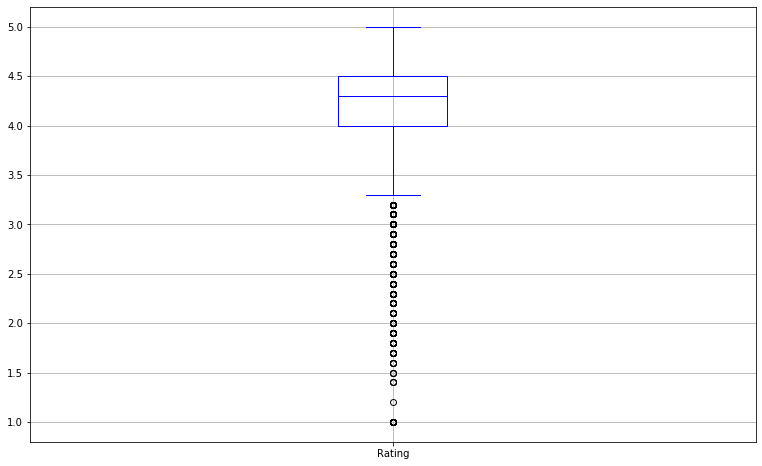

In [37]:
## Again draw boxplot and see the difference
app_rating_data.boxplot(figsize=(13,8),color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115F3ED0>]],
      dtype=object)

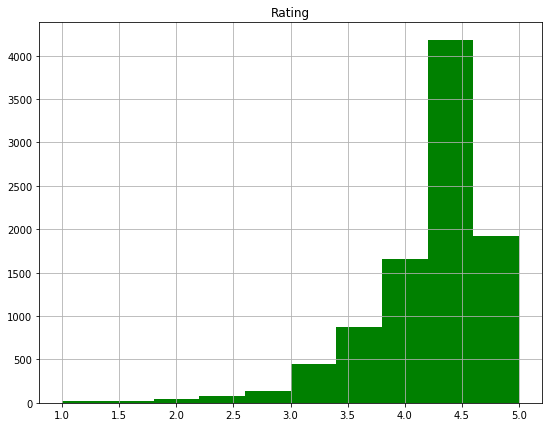

In [38]:
app_rating_data.hist(color='green',figsize=(9,7))

## Remove columns that consist of null values:

In [76]:
threshold=len(app_rating_data)*0.1
threshold

1084.0

In [77]:
app_rating_data.dropna(thresh=threshold, axis=1, inplace=True)

In [78]:
app_rating_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### fill the null values either with mean,median,mode.

In [79]:
def inpute_median(series):
    return series.fillna(series.median())

In [83]:
app_rating_data.Rating=app_rating_data['Rating'].transform(inpute_median)

In [84]:
app_rating_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [87]:
print(app_rating_data['Type'].mode())
app_rating_data['Android Ver'].mode()

0    Free
dtype: object


0    4.1 and up
dtype: object

In [88]:
app_rating_data['Current Ver'].mode()

0    Varies with device
dtype: object

In [86]:
app_rating_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Fill the missing value with mode:

In [89]:
app_rating_data['Type'].fillna(str(app_rating_data['Type'].mode().values[0]),inplace=True)
app_rating_data['Current Ver'].fillna(str(app_rating_data['Current Ver'].mode().values[0]),inplace=True)
app_rating_data['Android Ver'].fillna(str(app_rating_data['Android Ver'].mode().values[0]),inplace=True)

In [90]:
app_rating_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Now let's convert Price,Installs and Rating into numerical values

In [99]:
app_rating_data['Price']=app_rating_data['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))

app_rating_data['Reviews']=pd.to_numeric(app_rating_data['Reviews'],errors='coerce')                                                       
app_rating_data['Price']=app_rating_data['Price'].apply(lambda x:float(x))                                                        

In [101]:
app_rating_data['Installs']=app_rating_data['Installs'].apply(lambda x: str(x).replace('+','')if '+' in str(x) else str(x))
app_rating_data['Installs']=app_rating_data['Installs'].apply(lambda x: str(x).replace(',','')if ',' in str(x) else str(x))
app_rating_data['Installs']=app_rating_data['Installs'].apply(lambda x: float(x))

In [102]:
app_rating_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Now let's check the datatype of each column:

In [103]:
app_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 804.5+ KB


In [105]:
app_rating_data.describe()      #statistical value after cleaning of data.

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Finally Data Visualization:)

In [106]:
grp=app_rating_data.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
x
y
z

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

In [107]:
y

Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.47
BEAUTY                    0.00
BOOKS_AND_REFERENCE     119.77
BUSINESS                185.27
COMICS                    0.00
COMMUNICATION            83.14
DATING                   31.43
EDUCATION                17.96
ENTERTAINMENT             7.98
EVENTS                  109.99
FAMILY                 2434.78
FINANCE                2900.83
FOOD_AND_DRINK            8.48
GAME                    287.30
HEALTH_AND_FITNESS       67.34
HOUSE_AND_HOME            0.00
LIBRARIES_AND_DEMO        0.99
LIFESTYLE              2360.87
MAPS_AND_NAVIGATION      26.95
MEDICAL                1439.96
NEWS_AND_MAGAZINES        3.98
PARENTING                 9.58
PERSONALIZATION         153.96
PHOTOGRAPHY             134.21
PRODUCTIVITY            250.93
SHOPPING                  5.48
SOCIAL                   15.97
SPORTS                  100.00
TOOLS                   267.25
TRAVEL_AND_LOCAL         49.95
VIDEO_PLAYERS            10.46

In [108]:
z

Category
ART_AND_DESIGN         2.637600e+04
AUTO_AND_VEHICLES      1.369019e+04
BEAUTY                 7.476226e+03
BOOKS_AND_REFERENCE    9.506090e+04
BUSINESS               3.033598e+04
COMICS                 5.638793e+04
COMMUNICATION          2.107138e+06
DATING                 3.115931e+04
EDUCATION              2.538191e+05
ENTERTAINMENT          3.971688e+05
EVENTS                 2.515906e+03
FAMILY                 2.080255e+05
FINANCE                4.795281e+04
FOOD_AND_DRINK         6.994748e+04
GAME                   1.385859e+06
HEALTH_AND_FITNESS     1.111253e+05
HOUSE_AND_HOME         4.518619e+04
LIBRARIES_AND_DEMO     1.220139e+04
LIFESTYLE              3.372457e+04
MAPS_AND_NAVIGATION    2.237902e+05
MEDICAL                3.425432e+03
NEWS_AND_MAGAZINES     1.922292e+05
PARENTING              1.597218e+04
PERSONALIZATION        2.279238e+05
PHOTOGRAPHY            6.373631e+05
PRODUCTIVITY           2.691438e+05
SHOPPING               4.424662e+05
SOCIAL             

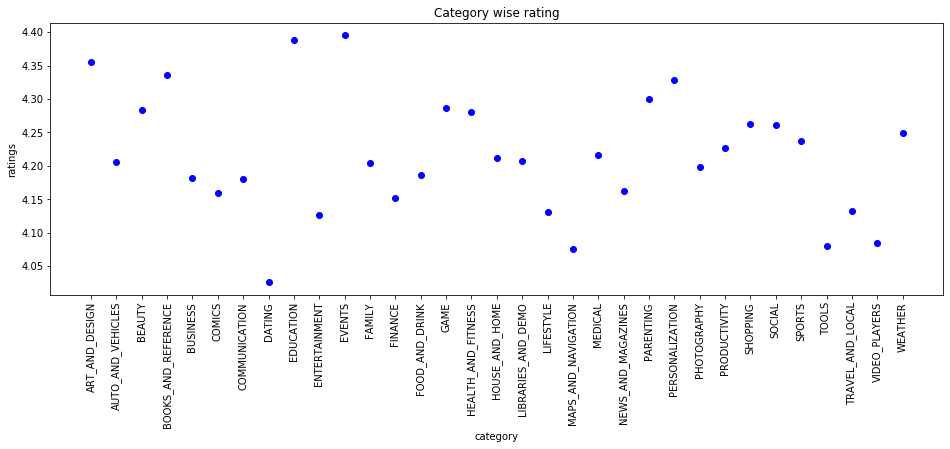

In [109]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color='blue')
plt.xticks(rotation=90)
plt.title('Category wise rating')
plt.xlabel('category')
plt.ylabel('ratings')
plt.show()

Let's see the graph basis on price:

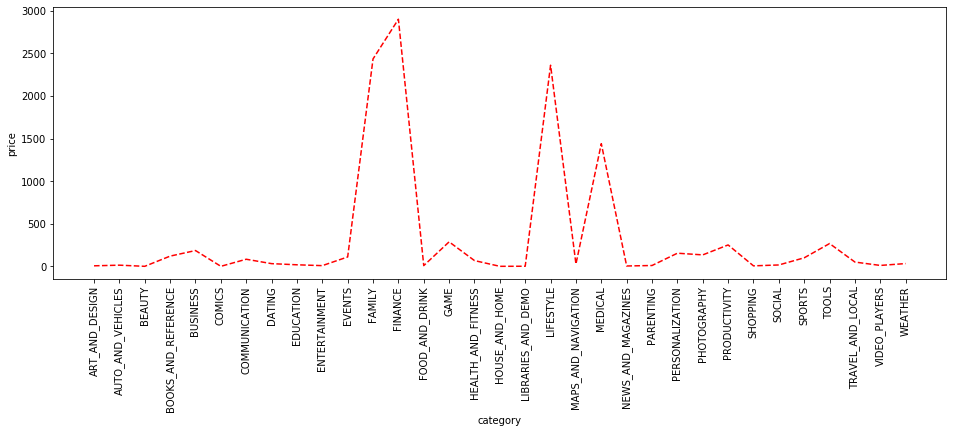

In [125]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--',color='r')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('price')
plt.show()

after analysing the above graph we can see that category of 'finance' 'lifestyle' 'medical' apps people are buying most.

let's check the insights from review:

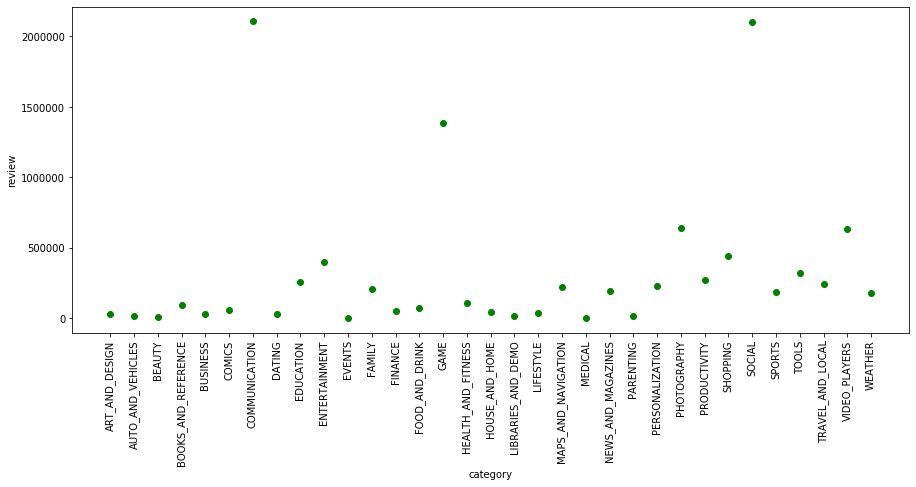

In [127]:
plt.figure(figsize=(15,6))
plt.plot(z,'ro',color='green')
plt.xticks(rotation=90)
plt.xlabel('category')
plt.ylabel('review')
plt.show()

After analysing review graph we can see that category of 'communication' 'game' and 'social' apps are reviewed by most of the people.